In [1]:
from IPython.display import Markdown, display

display(Markdown("# Extração feita em 30/dezembro/2025"))

# Extração feita em 30/dezembro/2025

In [2]:
from pathlib import Path
import json
import pandas as pd

data_dir = Path("data")
json_paths = sorted(data_dir.glob("*.json"))

if not json_paths:
    raise FileNotFoundError(f"No .json files found in: {data_dir.resolve()}")

def _infer_source(p: Path) -> str:
    name = p.stem.lower()
    if "aoc" in name:
        return "aoc"
    if "trump" in name:
        return "trump"
    return "unknown"

def _load_json(path: Path):
    with path.open("r", encoding="utf-8") as f:
        return json.load(f)

frames = []
for p in json_paths:
    payload = _load_json(p)
    source = _infer_source(p)

    if isinstance(payload, list):
        tmp = pd.json_normalize(payload)
    elif isinstance(payload, dict):
        tmp = pd.json_normalize(payload)
    else:
        raise TypeError(f"Unsupported JSON root type in {p.name}: {type(payload)}")

    tmp["source"] = source
    frames.append(tmp)

df = pd.concat(frames, ignore_index=True)

# Keep only aoc/trump if both were detected (otherwise keep everything for inspection)
if set(df["source"].unique()) >= {"aoc", "trump"}:
    df = df[df["source"].isin(["aoc", "trump"])].reset_index(drop=True)

df = df.drop(columns=["permalink", "aria_label"], errors="ignore")

Tweets AOC

In [ ]:
df[df["source"].eq("aoc")].head()

,datetime,text,subtext,has_video,image_count,answers,reposts,likes,saves,views,source
0,2024-06-07T15:05:14.000Z,The cynics will tell you that one vote won’t c...,None,True,0,46082,7466,31094,1574,16477239,aoc
1,2025-12-19T21:18:17.000Z,Now the coverup is out in the open. This is fa...,Epstein Files: 119-page grand jury document en...,False,0,8848,37370,235420,4779,9357246,aoc
2,2025-12-17T23:56:52.000Z,Like I said: view all political developments f...,NEW: Congress is giving itself an early holida...,False,1,1090,9565,44921,1387,2158181,aoc
3,2025-12-17T22:02:33.000Z,Reminder that the Epstein Files are supposed t...,None,False,0,1926,26547,183618,3457,3535351,aoc
4,2025-12-17T16:57:28.000Z,“I have not lost control of the House” sounds ...,Asked Speaker Johnson if he’s lost control of ...,True,0,749,3972,35567,418,763299,aoc


Tweets Trump

In [ ]:
df[df["source"].eq("trump")].head()

,datetime,text,subtext,has_video,image_count,answers,reposts,likes,saves,views,source
11,2025-12-25T02:12:53.000Z,"Merry Christmas to all, including the Radical ...",None,False,0,62248,98485,768724,29316,58414618,trump
12,2025-12-23T20:35:55.000Z,THE TRUMP KENNEDY CENTER HONORS will be broadc...,None,False,0,21373,23949,155443,7186,29952274,trump
13,2025-12-02T16:52:21.000Z,I am asking all America First Patriots in Tenn...,None,False,1,29022,30923,148895,3488,18960297,trump
14,2025-12-02T02:10:14.000Z,I am asking all America First Patriots in Tenn...,None,False,1,14582,36015,162207,3447,18250874,trump
15,2025-11-29T13:27:23.000Z,"To all Airlines, Pilots, Drug Dealers, and Hum...",None,False,0,37508,91126,605389,23425,82113954,trump


In [5]:
from contextlib import contextmanager
import matplotlib.pyplot as plt

@contextmanager
def xkcd_context(font: str = "Comic Neue"):
    """XKCD style + force a known-installed font to avoid findfont warnings."""
    with plt.xkcd():
        with plt.rc_context({"font.family": [font], "font.cursive": [font]}):
            yield

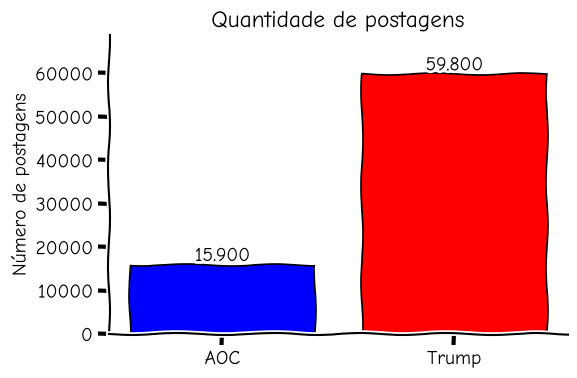

In [6]:
import matplotlib.pyplot as plt

labels = ["AOC", "Trump"]
counts = [15900, 59800]
colors = ["blue", "red"]

with xkcd_context():
    fig, ax = plt.subplots(figsize=(6, 4))

    bars = ax.bar(labels, counts, color=colors, edgecolor="black", linewidth=1.2)

    ax.set_title("Quantidade de postagens")
    ax.set_ylabel("Número de postagens")

    for bar, val in zip(bars, counts):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            val,
            f"{val:,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax.set_ylim(0, max(counts) * 1.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    fig.tight_layout()
    plt.show()

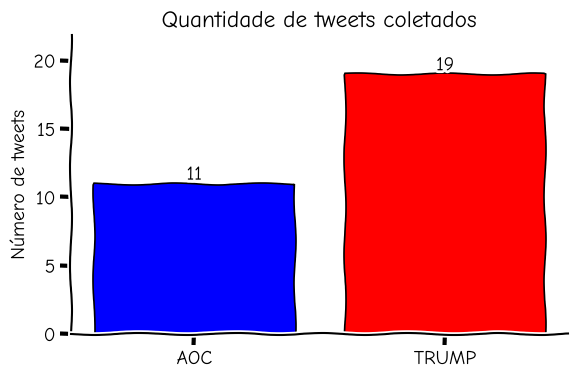

In [29]:
# Gráfico de barras: quantidade de tweets coletados (AOC vs Trump)
counts_src = (
    df["source"]
    .value_counts()
    .reindex(["aoc", "trump"])
    .dropna()
    .astype(int)
)

plot_labels_ct = [s.upper() for s in counts_src.index]
plot_colors_ct = colors[: len(counts_src)]

with xkcd_context():
    fig_ct, ax_ct = plt.subplots(figsize=(6, 4))

    bars_ct = ax_ct.bar(
        plot_labels_ct,
        counts_src.values,
        color=plot_colors_ct,
        edgecolor="black",
        linewidth=1.2,
    )

    ax_ct.set_title("Quantidade de tweets coletados")
    ax_ct.set_ylabel("Número de tweets")

    for b, v in zip(bars_ct, counts_src.values):
        ax_ct.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(v):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax_ct.set_ylim(0, float(counts_src.max()) * 1.15)
    ax_ct.spines["top"].set_visible(False)
    ax_ct.spines["right"].set_visible(False)

    fig_ct.tight_layout()
    plt.show()

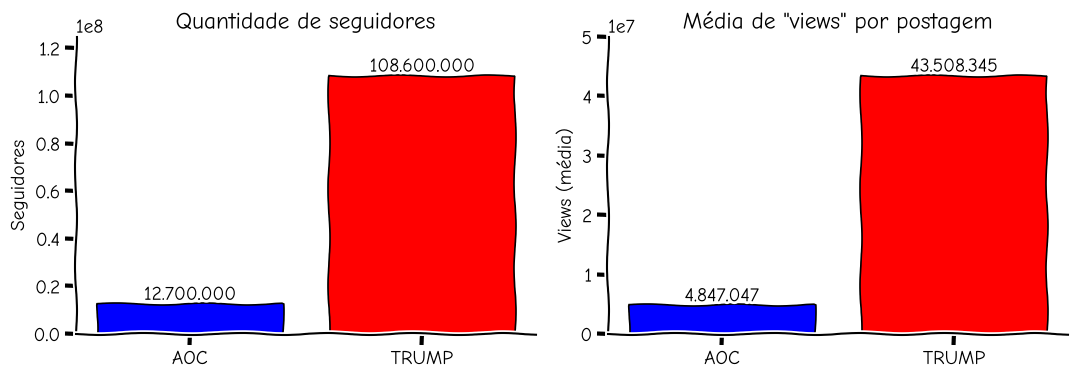

**Observação:** O Trump tem ~**8.6x** mais seguidores que a AOC. Na **média de views por postagem**, o Trump tem ~**9.0x** mais views.

In [12]:
# Seguidores (valores fornecidos)
followers = pd.Series({"aoc": 12_700_000, "trump": 108_600_000}, name="followers")

# Média de "views" por fonte (média de views por postagem do político)
avg_views = df.groupby("source")["views"].mean().reindex(["aoc", "trump"]).dropna()

# Alinha seguidores com as fontes disponíveis
followers = followers.reindex(avg_views.index)

plot_labels = [s.upper() for s in avg_views.index]
plot_colors = colors[: len(avg_views)]

with xkcd_context():
    fig4, (ax4, ax4b) = plt.subplots(1, 2, figsize=(11, 4))

    # --- (1) Seguidores ---
    bars_f = ax4.bar(
        plot_labels,
        followers.values,
        color=plot_colors,
        edgecolor="black",
        linewidth=1.2,
    )
    ax4.set_title("Quantidade de seguidores")
    ax4.set_ylabel("Seguidores")

    for b, v in zip(bars_f, followers.values):
        ax4.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(v):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax4.set_ylim(0, float(followers.max()) * 1.15)
    ax4.spines["top"].set_visible(False)
    ax4.spines["right"].set_visible(False)

    # --- (2) Média de views por político (por postagem) ---
    bars_av = ax4b.bar(
        plot_labels,
        avg_views.values,
        color=plot_colors,
        edgecolor="black",
        linewidth=1.2,
    )
    ax4b.set_title('Média de "views" por postagem')
    ax4b.set_ylabel("Views (média)")

    for b, v in zip(bars_av, avg_views.values):
        ax4b.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(round(v)):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax4b.set_ylim(0, float(avg_views.max()) * 1.15)
    ax4b.spines["top"].set_visible(False)
    ax4b.spines["right"].set_visible(False)

    fig4.tight_layout()
    plt.show()

# Texto explicativo (PT-BR)
if {"aoc", "trump"}.issubset(set(avg_views.index)) and {"aoc", "trump"}.issubset(set(followers.index)):
    ratio_followers = followers.loc["trump"] / followers.loc["aoc"]
    ratio_views = avg_views.loc["trump"] / avg_views.loc["aoc"]

    display(
        Markdown(
            f"**Observação:** O Trump tem ~**{ratio_followers:.1f}x** mais seguidores que a AOC. "
            f"Na **média de views por postagem**, o Trump tem ~**{ratio_views:.1f}x** mais views."
        )
    )


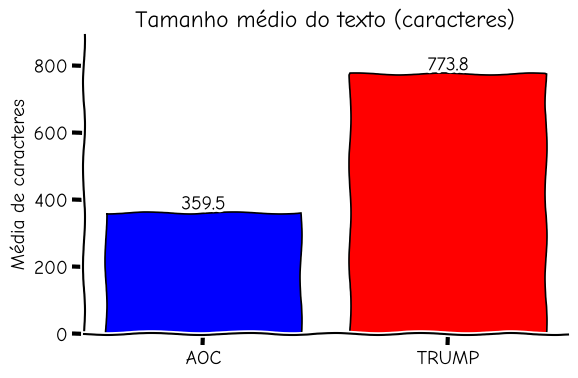

**Observação:** em média, o texto do Trump é ~**2.15x** maior (em caracteres) do que o da AOC.

In [30]:
# Average length (in characters) of the "text" field per source
avg_len = (
    df.loc[df["text"].notna(), ["source", "text"]]
      .assign(text_len=lambda d: d["text"].str.len())
      .groupby("source")["text_len"]
      .mean()
)

order = [s.lower() for s in labels] if "labels" in globals() else list(avg_len.index)
avg_len = avg_len.reindex([s for s in order if s in avg_len.index])

with xkcd_context():
    fig3, ax3 = plt.subplots(figsize=(6, 4))

    bars3 = ax3.bar(
        [s.upper() for s in avg_len.index],
        avg_len.values,
        color=colors[: len(avg_len)],
        edgecolor="black",
        linewidth=1.2,
    )

    ax3.set_title("Tamanho médio do texto (caracteres)")
    ax3.set_ylabel("Média de caracteres")

    for b3, v3 in zip(bars3, avg_len.values):
        ax3.text(
            b3.get_x() + b3.get_width() / 2,
            v3,
            f"{v3:.1f}",
            ha="center",
            va="bottom",
        )

    ax3.set_ylim(0, max(avg_len.values) * 1.15)
    ax3.spines["top"].set_visible(False)
    ax3.spines["right"].set_visible(False)

    fig3.tight_layout()
    plt.show()

    # Observação: proporção do tamanho médio do texto (Trump vs AOC)
    if {"aoc", "trump"}.issubset(set(avg_len.index)):
        ratio_text_len = avg_len.loc["trump"] / avg_len.loc["aoc"]
        display(
            Markdown(
                f"**Observação:** em média, o texto do Trump é ~**{ratio_text_len:.2f}x** "
                f"maior (em caracteres) do que o da AOC."
            )
        )

In [28]:
# Longest "text" tweet + its length for AOC and Trump
_longest_df = (
    df.loc[df["text"].notna(), ["source", "text"]]
      .assign(text_len=lambda d: d["text"].str.len())
)

for _src in ["aoc", "trump"]:
    _sdf = _longest_df[_longest_df["source"].eq(_src)]
    if _sdf.empty:
        print(f"{_src.upper()}: no non-null 'text' tweets found.\n")
        continue

    _idx = _sdf["text_len"].idxmax()
    _row = _sdf.loc[_idx]

    display(
        Markdown(
            f"{_src.upper()} — tamanho do tweet mais longo: **{_row['text_len']}** caracteres"
        )
    )
    print(_row["text"])
    print("\n" + "-" * 80 + "\n")

AOC — tamanho do tweet mais longo: **2288** caracteres

This is how I feel about it.

I loathe machine politics and got to office defeating an incumbent who got in that way.

However there are quite a few problems with choosing to grind the entire House to a halt to force all 435 members across the country to do a rushed vote on this one individual instance (of many, mind you!).

1. Why is it that this objection wasn’t brought up until now? The author had no problem when Bill Posey did it, or even earlier this year when a member’s account was tweeting post mortem for an election. The standard of this resolution is unevenly applied and choosing to enforce it via privileged resolution for some but not others does open legitimate questions of rationale or motivation. Why not care about this for them, but care about it now? This question has not been answered.

2. This is why the Ethics Committee exists. Establishing this process as precedent will mean all 435 members of the House will be forced to vote on a slew of individual member indiscreti

TRUMP — tamanho do tweet mais longo: **3232** caracteres

A very Happy Thanksgiving salutation to all of our Great American Citizens and Patriots who have been so nice in allowing our Country to be divided, disrupted, carved up, murdered, beaten, mugged, and laughed at, along with certain other foolish countries throughout the World, for being “Politically Correct,” and just plain STUPID, when it comes to Immigration. The official United States Foreign population stands at 53 million people (Census), most of which are on welfare, from failed nations, or from prisons, mental institutions, gangs, or drug cartels. They and their children are supported through massive payments from Patriotic American Citizens who, because of their beautiful hearts, do not want to openly complain or cause trouble in any way, shape, or form. They put up with what has happened to our Country, but it’s eating them alive to do so! A migrant earning $30,000 with a green card will get roughly $50,000 in yearly benefits for their family. The real migrant population is mu

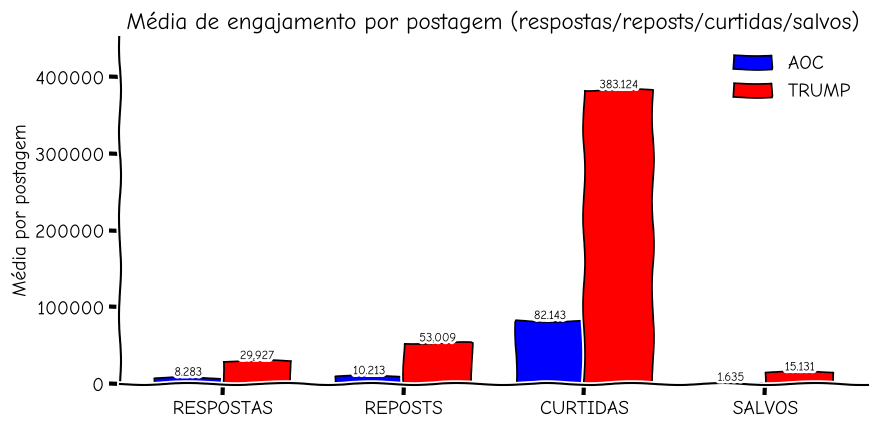

**Observações:**
- Na média de **respostas** por postagem, o Trump tem ~**3.6x** a mais que a AOC.
- Na média de **reposts** por postagem, o Trump tem ~**5.2x** a mais que a AOC.
- Na média de **curtidas** por postagem, o Trump tem ~**4.7x** a mais que a AOC.
- Na média de **salvos** por postagem, o Trump tem ~**9.3x** a mais que a AOC.

In [19]:
# Bar chart: average engagement metrics per source (AOC vs Trump)
metrics = ["answers", "reposts", "likes", "saves"]
plot_df = (
    df.groupby("source")[metrics]
      .mean()
      .reindex(["aoc", "trump"])
      .dropna(how="all")
)

x = range(len(metrics))
bar_w = 0.38

with xkcd_context():
    fig5, ax5 = plt.subplots(figsize=(9, 4.5))

    sources = list(plot_df.index)
    for i, src in enumerate(sources):
        vals = plot_df.loc[src, metrics].values
        xs = [k + (i - (len(sources) - 1) / 2) * bar_w for k in x]

        bars5 = ax5.bar(
            xs,
            vals,
            width=bar_w,
            label=src.upper(),
            color=colors[i] if i < len(colors) else None,
            edgecolor="black",
            linewidth=1.2,
        )

        for b in bars5:
            v = b.get_height()
            ax5.text(
                b.get_x() + b.get_width() / 2,
                v,
                f"{int(round(v)):,}".replace(",", "."),
                ha="center",
                va="bottom",
                fontsize=9,
            )

    ax5.set_xticks(list(x))
    ax5.set_xticklabels([m.upper() for m in metrics])
    ax5.set_title("Média de engajamento por postagem (respostas/reposts/curtidas/salvos)")
    ax5.set_ylabel("Média por postagem")
    ax5.legend(frameon=False)

    ax5.spines["top"].set_visible(False)
    ax5.spines["right"].set_visible(False)
    ax5.set_ylim(0, float(plot_df.max().max()) * 1.18)

    label_map = {"answers": "respostas", "reposts": "reposts", "likes": "curtidas", "saves": "salvos"}

    ax5.set_xticklabels([label_map.get(m, m).upper() for m in metrics])

    fig5.tight_layout()
    plt.show()

    # Texto explicativo: quanto Trump tem a mais que AOC em cada métrica do gráfico
    if {"aoc", "trump"}.issubset(set(plot_df.index)):
        metric_names_pt = {
            "answers": "respostas",
            "reposts": "reposts",
            "likes": "curtidas",
            "saves": "salvos",
        }

        ratios = (plot_df.loc["trump", metrics] / plot_df.loc["aoc", metrics]).replace(
            [float("inf"), -float("inf")], pd.NA
        )

        lines = []
        for m in metrics:
            r = ratios.get(m)
            if pd.notna(r) and r > 0:
                lines.append(
                    f"- Na média de **{metric_names_pt.get(m, m)}** por postagem, o Trump tem ~**{float(r):.1f}x** a mais que a AOC."
                )
            else:
                lines.append(f"- Na média de **{metric_names_pt.get(m, m)}** por postagem, não foi possível calcular a razão.")

        display(Markdown("**Observações:**\n" + "\n".join(lines)))

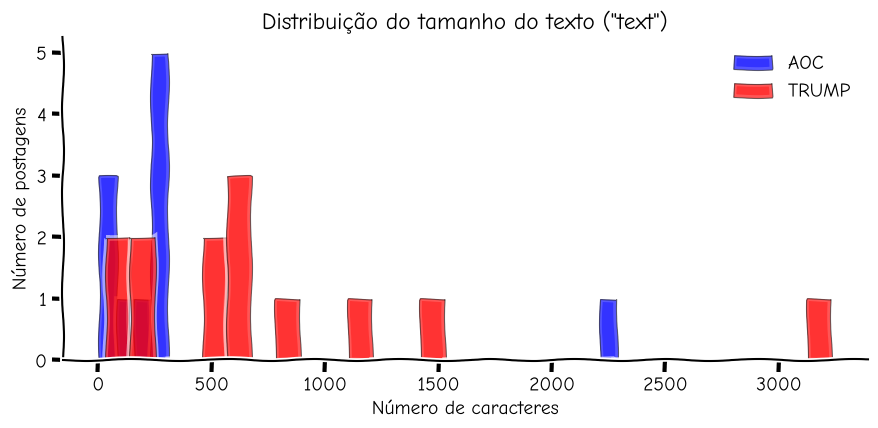

In [23]:
# Histogram: distribution of text length (characters) by source (AOC vs Trump)
text_len_df = (
    df.loc[df["text"].notna(), ["source", "text"]]
      .assign(text_len=lambda d: d["text"].str.len())
)

bins = 30
sources_to_plot = ["aoc", "trump"]

with xkcd_context():
    fig6, ax6 = plt.subplots(figsize=(9, 4.5))

    for i, src in enumerate(sources_to_plot):
        s = text_len_df.loc[text_len_df["source"].eq(src), "text_len"]
        if s.empty:
            continue

        ax6.hist(
            s,
            bins=bins,
            alpha=0.55,
            label=src.upper(),
            color=colors[i] if i < len(colors) else None,
            edgecolor="black",
            linewidth=0.8,
        )

    ax6.set_title('Distribuição do tamanho do texto ("text")')
    ax6.set_xlabel("Número de caracteres")
    ax6.set_ylabel("Número de postagens")
    ax6.legend(frameon=False)

    ax6.spines["top"].set_visible(False)
    ax6.spines["right"].set_visible(False)

    fig6.tight_layout()
    plt.show()

## Textos escritos e repostagens

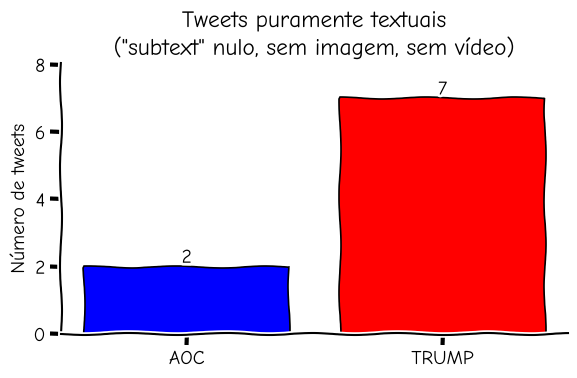

**Observação:** considerando tweets **puramente textuais** (subtext nulo, sem imagem e sem vídeo), o Trump tem ~**3.50x** a quantidade da AOC.

In [33]:
# Gráfico de barras: tweets "puramente textuais"
# (subtext nulo, sem imagens (image_count=0) e sem vídeo (has_video=False))
pure_text_counts = (
    df.assign(
        is_pure_text=(
            df["subtext"].isna()
            & df["image_count"].fillna(0).eq(0)
            & ~df["has_video"].fillna(False)
            & df["text"].notna()
        )
    )
    .groupby("source")["is_pure_text"]
    .sum()
    .reindex(["aoc", "trump"])
    .dropna()
    .astype(int)
)

pure_text_labels = [s.upper() for s in pure_text_counts.index]
pure_text_colors = colors[: len(pure_text_counts)] if "colors" in globals() else None

with xkcd_context():
    fig_pt, ax_pt = plt.subplots(figsize=(6, 4))

    bars_pt = ax_pt.bar(
        pure_text_labels,
        pure_text_counts.values,
        color=pure_text_colors,
        edgecolor="black",
        linewidth=1.2,
    )

    ax_pt.set_title('Tweets puramente textuais\n("subtext" nulo, sem imagem, sem vídeo)')
    ax_pt.set_ylabel("Número de tweets")

    for b, v in zip(bars_pt, pure_text_counts.values):
        ax_pt.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(v):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax_pt.set_ylim(0, float(pure_text_counts.max()) * 1.15 if len(pure_text_counts) else 1)
    ax_pt.spines["top"].set_visible(False)
    ax_pt.spines["right"].set_visible(False)

    fig_pt.tight_layout()
    plt.show()

# Observação de proporção (Trump vs AOC), se ambos existirem
if {"aoc", "trump"}.issubset(set(pure_text_counts.index)) and pure_text_counts.loc["aoc"] > 0:
    ratio_pure_text = pure_text_counts.loc["trump"] / pure_text_counts.loc["aoc"]
    display(
        Markdown(
            f'**Observação:** considerando tweets **puramente textuais** (subtext nulo, sem imagem e sem vídeo), '
            f'o Trump tem ~**{ratio_pure_text:.2f}x** a quantidade da AOC.'
        )
    )
elif {"aoc", "trump"}.issubset(set(pure_text_counts.index)) and pure_text_counts.loc["aoc"] == 0:
    display(
        Markdown(
            '**Observação:** a AOC tem **0** tweets puramente textuais nesta amostra; não é possível calcular a proporção.'
        )
    )

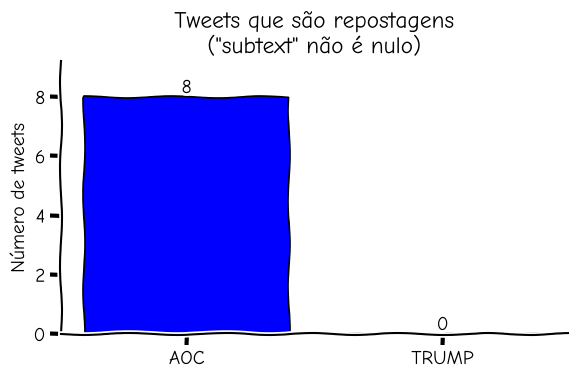

**Observação:** nesta amostra, o Trump **não repostou tweet de ninguém** (0 repostagens; "subtext" sempre nulo).

In [41]:
# Gráfico de barras: quantidade de tweets que são repostagens (subtext não nulo)
repost_counts = (
    df.assign(is_repost=df["subtext"].notna())
      .groupby("source")["is_repost"]
      .sum()
      .reindex(["aoc", "trump"])
      .dropna()
      .astype(int)
)

repost_labels = [s.upper() for s in repost_counts.index]
repost_colors = colors[: len(repost_counts)] if "colors" in globals() else None

with xkcd_context():
    fig_rp, ax_rp = plt.subplots(figsize=(6, 4))

    bars_rp = ax_rp.bar(
        repost_labels,
        repost_counts.values,
        color=repost_colors,
        edgecolor="black",
        linewidth=1.2,
    )

    ax_rp.set_title('Tweets que são repostagens\n("subtext" não é nulo)')
    ax_rp.set_ylabel("Número de tweets")

    for b, v in zip(bars_rp, repost_counts.values):
        ax_rp.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(v):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax_rp.set_ylim(0, float(repost_counts.max()) * 1.15 if len(repost_counts) else 1)
    ax_rp.spines["top"].set_visible(False)
    ax_rp.spines["right"].set_visible(False)

    fig_rp.tight_layout()
    plt.show()

# Observação de proporção (Trump vs AOC), se ambos existirem
if {"aoc", "trump"}.issubset(set(repost_counts.index)) and repost_counts.loc["trump"] > 0:
    ratio_reposts = repost_counts.loc["trump"] / repost_counts.loc["aoc"]
    display(
        Markdown(
            f'**Observação:** considerando repostagens ("subtext" não nulo), '
            f'o Trump tem ~**{ratio_reposts:.2f}x** a quantidade da AOC.'
        )
    )
elif {"aoc", "trump"}.issubset(set(repost_counts.index)) and repost_counts.loc["trump"] == 0:
    display(
        Markdown(
            '**Observação:** nesta amostra, o Trump **não repostou tweet de ninguém** (0 repostagens; "subtext" sempre nulo).'
        )
    )

In [34]:
# 2 tweets da AOC sem subtext, sem imagens e sem vídeo (tweets "puramente textuais")
aoc_puro_texto = df.loc[
    df["source"].eq("aoc")
    & df["subtext"].isna()
    & df["image_count"].fillna(0).eq(0)
    & ~df["has_video"].fillna(False)
    & df["text"].notna(),
    ["datetime", "text", "views", "likes", "reposts", "answers", "saves"],
].head(2)

if aoc_puro_texto.empty:
    print("Não há tweets da AOC sem subtext, sem imagens e sem vídeo nesta amostra.")
else:
    for i, row in enumerate(aoc_puro_texto.itertuples(index=False), start=1):
        display(Markdown(f"### AOC — Tweet puro (texto) {i}"))
        if hasattr(row, "datetime") and row.datetime is not None:
            print(f"datetime: {row.datetime}")
        print(f"views: {row.views} | likes: {row.likes} | reposts: {row.reposts} | answers: {row.answers} | saves: {row.saves}")
        print(row.text)
        print("\n" + "-" * 80 + "\n")

### AOC — Tweet puro (texto) 1

datetime: 2025-12-17T22:02:33.000Z
views: 3535351 | likes: 183618 | reposts: 26547 | answers: 1926 | saves: 3457
Reminder that the Epstein Files are supposed to be released on Friday and every political development that you see between now until then should be viewed with that in mind.

--------------------------------------------------------------------------------



### AOC — Tweet puro (texto) 2

datetime: 2025-11-10T01:53:07.000Z
views: 2965783 | likes: 79074 | reposts: 11354 | answers: 10448 | saves: 1325
The average monthly SNAP benefit is $177 a person.

The average ACA benefit is up to $550 a person/mo.

People want us to hold the line for a reason. This is not a matter of appealing to a base. It’s about people’s lives.

Working people want leaders whose word means something.

--------------------------------------------------------------------------------



## Imagens

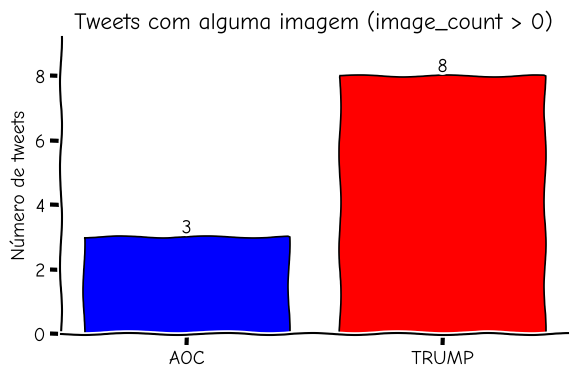

In [35]:
# Gráfico de barras: quantidade de tweets com alguma imagem (image_count > 0)
img_counts = (
    df.assign(has_image=df["image_count"].fillna(0).gt(0))
      .groupby("source")["has_image"]
      .sum()
      .reindex(["aoc", "trump"])
      .dropna()
      .astype(int)
)

img_labels = [s.upper() for s in img_counts.index]
img_colors = colors[: len(img_counts)] if "colors" in globals() else None

with xkcd_context():
    fig_img, ax_img = plt.subplots(figsize=(6, 4))

    bars_img = ax_img.bar(
        img_labels,
        img_counts.values,
        color=img_colors,
        edgecolor="black",
        linewidth=1.2,
    )

    ax_img.set_title("Tweets com alguma imagem (image_count > 0)")
    ax_img.set_ylabel("Número de tweets")

    for b, v in zip(bars_img, img_counts.values):
        ax_img.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(v):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax_img.set_ylim(0, float(img_counts.max()) * 1.15 if len(img_counts) else 1)
    ax_img.spines["top"].set_visible(False)
    ax_img.spines["right"].set_visible(False)

    fig_img.tight_layout()
    plt.show()

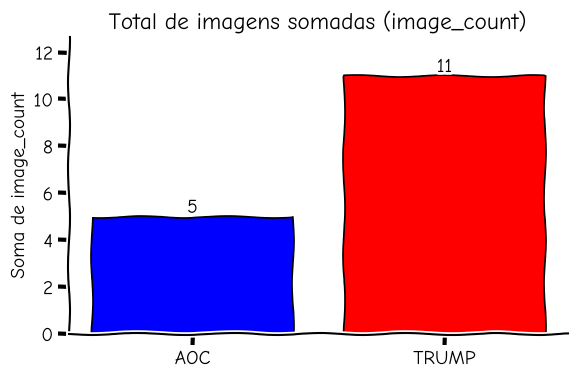

In [36]:
# Soma total de imagens (image_count) por fonte (AOC vs Trump)
img_sum = (
    df.assign(image_count=df["image_count"].fillna(0))
      .groupby("source")["image_count"]
      .sum()
      .reindex(["aoc", "trump"])
      .dropna()
      .astype(int)
)

img_sum_labels = [s.upper() for s in img_sum.index]
img_sum_colors = colors[: len(img_sum)] if "colors" in globals() else None

with xkcd_context():
    fig_is, ax_is = plt.subplots(figsize=(6, 4))

    bars_is = ax_is.bar(
        img_sum_labels,
        img_sum.values,
        color=img_sum_colors,
        edgecolor="black",
        linewidth=1.2,
    )

    ax_is.set_title("Total de imagens somadas (image_count)")
    ax_is.set_ylabel("Soma de image_count")

    for b, v in zip(bars_is, img_sum.values):
        ax_is.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(v):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax_is.set_ylim(0, float(img_sum.max()) * 1.15 if len(img_sum) else 1)
    ax_is.spines["top"].set_visible(False)
    ax_is.spines["right"].set_visible(False)

    fig_is.tight_layout()
    plt.show()

## Vídeo

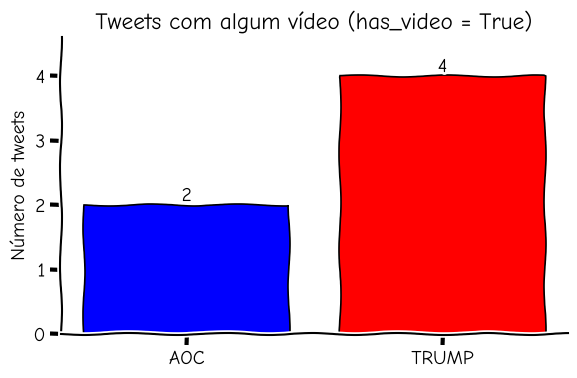

In [37]:
# Gráfico de barras: quantidade de tweets com vídeo (has_video=True)
video_counts = (
    df.assign(has_video=df["has_video"].fillna(False).astype(bool))
      .groupby("source")["has_video"]
      .sum()
      .reindex(["aoc", "trump"])
      .dropna()
      .astype(int)
)

video_labels = [s.upper() for s in video_counts.index]
video_colors = colors[: len(video_counts)] if "colors" in globals() else None

with xkcd_context():
    fig_vid, ax_vid = plt.subplots(figsize=(6, 4))

    bars_vid = ax_vid.bar(
        video_labels,
        video_counts.values,
        color=video_colors,
        edgecolor="black",
        linewidth=1.2,
    )

    ax_vid.set_title("Tweets com algum vídeo (has_video = True)")
    ax_vid.set_ylabel("Número de tweets")

    for b, v in zip(bars_vid, video_counts.values):
        ax_vid.text(
            b.get_x() + b.get_width() / 2,
            v,
            f"{int(v):,}".replace(",", "."),
            ha="center",
            va="bottom",
        )

    ax_vid.set_ylim(0, float(video_counts.max()) * 1.15 if len(video_counts) else 1)
    ax_vid.spines["top"].set_visible(False)
    ax_vid.spines["right"].set_visible(False)

    fig_vid.tight_layout()
    plt.show()

## Datas

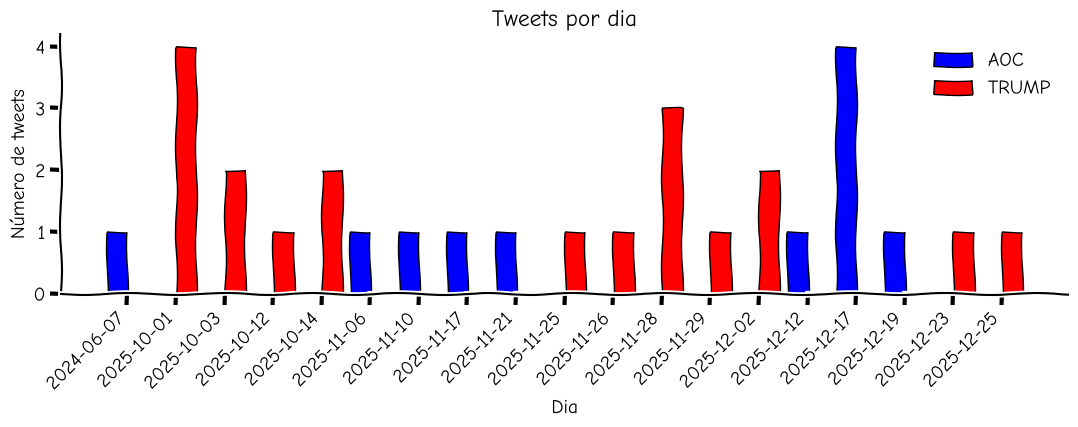

In [45]:
# Quantidade de tweets por dia (AOC vs Trump) — gráfico em barras
df_dates = df.copy()
df_dates["day"] = pd.to_datetime(df_dates["datetime"], utc=True, errors="coerce").dt.date

daily_counts = (
    df_dates.dropna(subset=["day"])
    .groupby(["day", "source"])
    .size()
    .unstack("source", fill_value=0)
    .sort_index()
)

# Garante ordem consistente (se existirem)
cols_order = [c for c in ["aoc", "trump"] if c in daily_counts.columns]
daily_counts = daily_counts[cols_order]

# Eixo X (dias)
days = list(daily_counts.index)
day_labels = [d.strftime("%Y-%m-%d") for d in days]
xpos = list(range(len(days)))

with xkcd_context():
    fig, ax = plt.subplots(figsize=(11, 4.5))

    n_src = len(daily_counts.columns)
    if n_src == 0:
        ax.set_title("Tweets por dia")
        ax.text(0.5, 0.5, "Sem dados de data para plotar.", ha="center", va="center")
        ax.axis("off")
        plt.show()
    elif n_src == 1:
        src = daily_counts.columns[0]
        ax.bar(
            xpos,
            daily_counts[src].values,
            label=src.upper(),
            color=colors[0] if "colors" in globals() and len(colors) > 0 else None,
            edgecolor="black",
            linewidth=1.0,
        )
    else:
        bar_w = 0.42 if n_src == 2 else 0.8 / n_src
        for i, src in enumerate(daily_counts.columns):
            offset = (i - (n_src - 1) / 2) * bar_w
            ax.bar(
                [x + offset for x in xpos],
                daily_counts[src].values,
                width=bar_w,
                label=src.upper(),
                color=colors[i] if "colors" in globals() and i < len(colors) else None,
                edgecolor="black",
                linewidth=1.0,
            )

    ax.set_title("Tweets por dia")
    ax.set_xlabel("Dia")
    ax.set_ylabel("Número de tweets")
    ax.set_xticks(xpos)
    ax.set_xticklabels(day_labels, rotation=45, ha="right")
    ax.legend(frameon=False)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    fig.tight_layout()
    plt.show()

In [46]:
# Em quais dias houve postagens de ambos (AOC e Trump)?
_dates = df.copy()
_dates["day"] = pd.to_datetime(_dates["datetime"], utc=True, errors="coerce").dt.date

daily_src = (
    _dates.dropna(subset=["day"])
    .groupby(["day", "source"])
    .size()
    .unstack("source", fill_value=0)
    .sort_index()
)

needed = [c for c in ["aoc", "trump"] if c in daily_src.columns]
if len(needed) < 2:
    display(Markdown("Não há dados suficientes (faltam AOC ou Trump) para encontrar dias em comum."))
else:
    both_days = daily_src[(daily_src["aoc"] > 0) & (daily_src["trump"] > 0)].copy()

    if both_days.empty:
        display(Markdown("**Não houve nenhum dia** com postagens de ambos os políticos nesta amostra."))
    else:
        display(Markdown(f"## Dias com postagens de ambos ({len(both_days)} dias)"))
        display(both_days.rename(columns={"aoc": "AOC", "trump": "TRUMP"}))

        # Lista simples (datas)
        both_day_list = [d.strftime("%Y-%m-%d") for d in both_days.index]
        display(Markdown("**Datas:** " + ", ".join(both_day_list)))

**Não houve nenhum dia** com postagens de ambos os políticos nesta amostra.

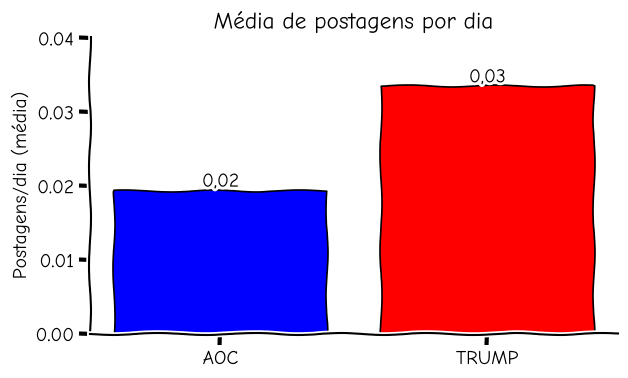

**Observação:** no período observado (incluindo dias com 0 postagens), o Trump posta em média ~**1.73x** mais por dia do que a AOC.

In [47]:
# Média de postagens por dia (incluindo dias sem postagem no intervalo observado)
df_day = df.copy()
df_day["day"] = pd.to_datetime(df_day["datetime"], utc=True, errors="coerce").dt.normalize()

daily = (
    df_day.dropna(subset=["day"])
    .groupby(["day", "source"])
    .size()
    .unstack("source", fill_value=0)
    .sort_index()
)

if daily.empty:
    display(Markdown("Não há dados de `datetime` suficientes para calcular a média de postagens por dia."))
else:
    full_days = pd.date_range(daily.index.min(), daily.index.max(), freq="D", tz=daily.index.tz)
    daily_full = daily.reindex(full_days, fill_value=0)

    avg_per_day = daily_full.mean().sort_index()

    # Ordem desejada (se existir)
    order = [s for s in ["aoc", "trump"] if s in avg_per_day.index]
    if order:
        avg_per_day = avg_per_day.reindex(order)

    bar_labels = [s.upper() for s in avg_per_day.index]
    bar_colors = colors[: len(avg_per_day)] if "colors" in globals() else None

    with xkcd_context():
        fig, ax = plt.subplots(figsize=(6.5, 4))

        bars = ax.bar(
            bar_labels,
            avg_per_day.values,
            color=bar_colors,
            edgecolor="black",
            linewidth=1.2,
        )

        ax.set_title("Média de postagens por dia")
        ax.set_ylabel("Postagens/dia (média)")

        for b, v in zip(bars, avg_per_day.values):
            ax.text(
                b.get_x() + b.get_width() / 2,
                v,
                f"{v:.2f}".replace(".", ","),
                ha="center",
                va="bottom",
            )

        ax.set_ylim(0, float(avg_per_day.max()) * 1.2 if len(avg_per_day) else 1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        fig.tight_layout()
        plt.show()

    if {"aoc", "trump"}.issubset(set(avg_per_day.index)) and avg_per_day.loc["aoc"] > 0:
        ratio_posts_day = avg_per_day.loc["trump"] / avg_per_day.loc["aoc"]
        display(
            Markdown(
                f"**Observação:** no período observado (incluindo dias com 0 postagens), "
                f"o Trump posta em média ~**{ratio_posts_day:.2f}x** mais por dia do que a AOC."
            )
        )

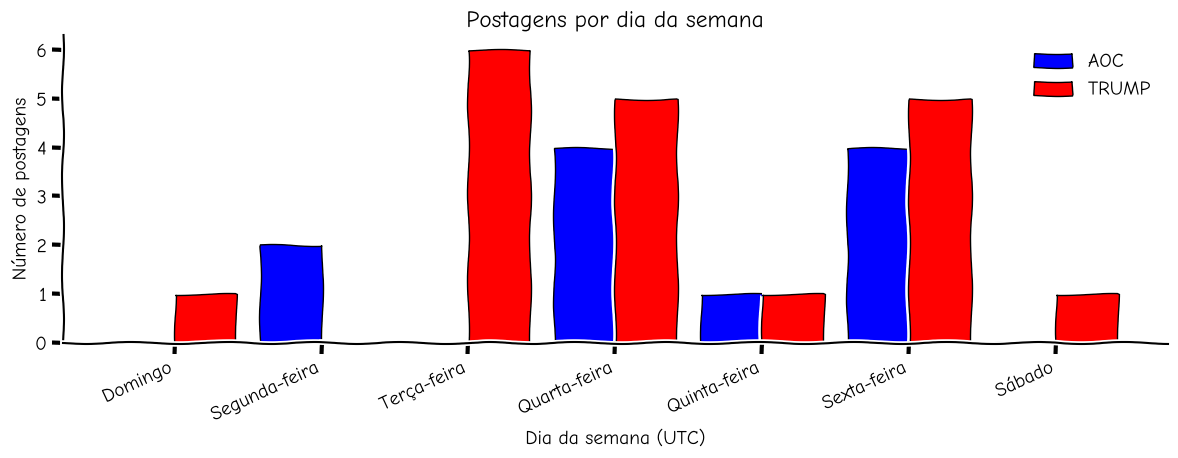

source,AOC,TRUMP
weekday_num,,
Domingo,0,1
Segunda-feira,2,0
Terça-feira,0,6
Quarta-feira,4,5
Quinta-feira,1,1
Sexta-feira,4,5
Sábado,0,1


**Observação:** na **terça-feira**, o Trump posta mais frequentemente. Ambos postam com frequência na **quarta-feira** e **sexta-feira**.

In [49]:
# Gráfico em barras: postagens por dia da semana (Domingo...Sábado), por fonte (AOC vs Trump)

df_wd = df.copy()
df_wd["dt"] = pd.to_datetime(df_wd["datetime"], utc=True, errors="coerce")

# 0=segunda ... 6=domingo
df_wd["weekday_num"] = df_wd["dt"].dt.weekday

weekday_names_pt = {
    6: "Domingo",
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
}
order = [6, 0, 1, 2, 3, 4, 5]

wd_counts = (
    df_wd.dropna(subset=["weekday_num"])
        .groupby(["weekday_num", "source"])
        .size()
        .unstack("source", fill_value=0)
        .reindex(order, fill_value=0)
)

# Mantém ordem de fontes consistente (se existirem)
src_order = [s for s in ["aoc", "trump"] if s in wd_counts.columns]
wd_counts = wd_counts[src_order]

x_labels = [weekday_names_pt[i] for i in wd_counts.index]
xpos = list(range(len(x_labels)))

with xkcd_context():
    fig, ax = plt.subplots(figsize=(12, 4.8))

    if wd_counts.empty or wd_counts.shape[1] == 0:
        ax.set_title("Postagens por dia da semana")
        ax.text(0.5, 0.5, "Sem dados suficientes para plotar.", ha="center", va="center")
        ax.axis("off")
        plt.show()
    elif wd_counts.shape[1] == 1:
        src = wd_counts.columns[0]
        ax.bar(
            xpos,
            wd_counts[src].values,
            color=colors[0] if "colors" in globals() and len(colors) else None,
            edgecolor="black",
            linewidth=1.0,
            label=src.upper(),
        )
    else:
        bar_w = 0.42
        for i, src in enumerate(wd_counts.columns):
            offset = (i - (wd_counts.shape[1] - 1) / 2) * bar_w
            ax.bar(
                [x + offset for x in xpos],
                wd_counts[src].values,
                width=bar_w,
                color=colors[i] if "colors" in globals() and i < len(colors) else None,
                edgecolor="black",
                linewidth=1.0,
                label=src.upper(),
            )

    ax.set_title("Postagens por dia da semana")
    ax.set_xlabel("Dia da semana (UTC)")
    ax.set_ylabel("Número de postagens")
    ax.set_xticks(xpos)
    ax.set_xticklabels(x_labels, rotation=25, ha="right")
    ax.legend(frameon=False)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    fig.tight_layout()
    plt.show()

display(wd_counts.rename(index=weekday_names_pt).rename(columns=str.upper))

display(
    Markdown(
        "**Observação:** na **terça-feira**, o Trump posta mais frequentemente. Ambos postam com frequência na **quarta-feira** e **sexta-feira**."
    )
)


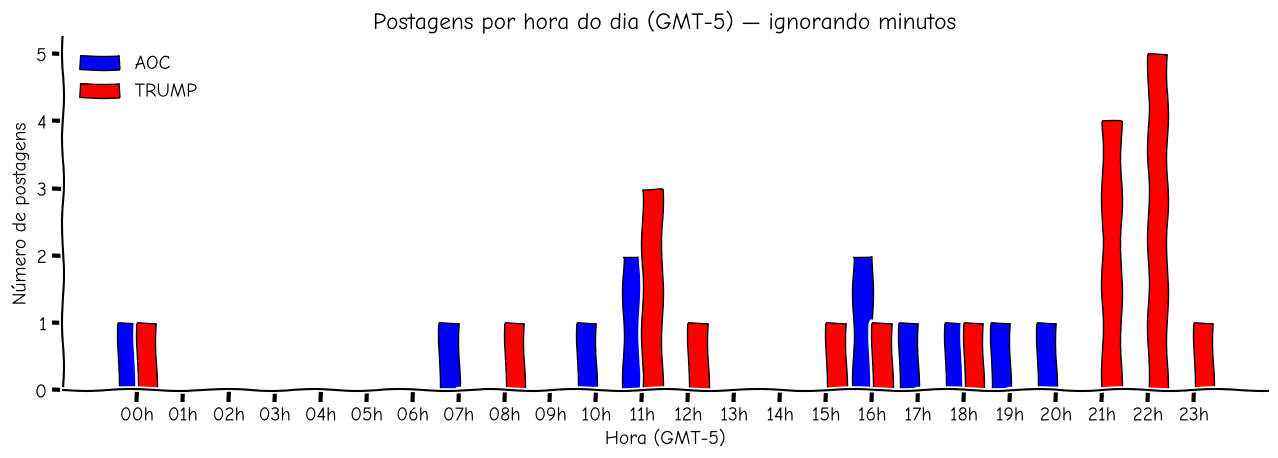

**Observação (GMT-5):**
- **AOC**: pico em **11h (GMT-5)** com **2** postagens.
- **TRUMP**: pico em **22h (GMT-5)** com **5** postagens.

In [51]:
# Gráfico em barras: postagens por hora do dia (ignorando minutos) — por fonte (AOC vs Trump)
# Agora em GMT-5 (Washington DC - horário padrão, sem considerar DST)

df_hr = df.copy()
df_hr["dt_utc"] = pd.to_datetime(df_hr["datetime"], utc=True, errors="coerce")

# Observação: em tz "Etc/GMT+5", o sinal é invertido por convenção do IANA:
# "Etc/GMT+5" == UTC-5
tz_gmt5 = "Etc/GMT+5"
df_hr["dt_local"] = df_hr["dt_utc"].dt.tz_convert(tz_gmt5)
df_hr["hour"] = df_hr["dt_local"].dt.hour

hourly_counts = (
    df_hr.dropna(subset=["hour"])
        .assign(hour=lambda d: d["hour"].astype(int))
        .groupby(["hour", "source"])
        .size()
        .unstack("source", fill_value=0)
        .reindex(range(24), fill_value=0)
)

# Mantém ordem consistente de fontes (se existirem)
src_order = [s for s in ["aoc", "trump"] if s in hourly_counts.columns]
if src_order:
    hourly_counts = hourly_counts[src_order]

# --- Plot ---
xpos = list(range(24))
xlabels = [f"{h:02d}h" for h in range(24)]

with xkcd_context():
    fig, ax = plt.subplots(figsize=(13, 4.8))

    if hourly_counts.shape[1] == 0:
        ax.set_title("Postagens por hora do dia (GMT-5)")
        ax.text(0.5, 0.5, "Sem dados suficientes para plotar.", ha="center", va="center")
        ax.axis("off")
        plt.show()
    elif hourly_counts.shape[1] == 1:
        src = hourly_counts.columns[0]
        ax.bar(
            xpos,
            hourly_counts[src].values,
            color=colors[0] if "colors" in globals() and len(colors) else None,
            edgecolor="black",
            linewidth=1.0,
            label=src.upper(),
        )
    else:
        bar_w = 0.42
        for i, src in enumerate(hourly_counts.columns):
            offset = (i - (hourly_counts.shape[1] - 1) / 2) * bar_w
            ax.bar(
                [x + offset for x in xpos],
                hourly_counts[src].values,
                width=bar_w,
                color=colors[i] if "colors" in globals() and i < len(colors) else None,
                edgecolor="black",
                linewidth=1.0,
                label=src.upper(),
            )

    ax.set_title("Postagens por hora do dia (GMT-5) — ignorando minutos")
    ax.set_xlabel("Hora (GMT-5)")
    ax.set_ylabel("Número de postagens")
    ax.set_xticks(xpos)
    ax.set_xticklabels(xlabels, rotation=0)
    ax.legend(frameon=False)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    fig.tight_layout()
    plt.show()

# --- Observação ---
if hourly_counts.shape[1] > 0:
    peaks = {}
    for src in hourly_counts.columns:
        s = hourly_counts[src]
        if (s > 0).any():
            peak_hour = int(s.idxmax())
            peak_count = int(s.max())
            peaks[src] = (peak_hour, peak_count)

    if peaks:
        lines = []
        for src, (h, c) in peaks.items():
            lines.append(f"- **{src.upper()}**: pico em **{h:02d}h (GMT-5)** com **{c}** postagens.")
        display(Markdown("**Observação (GMT-5):**\n" + "\n".join(lines)))
    else:
        display(Markdown("**Observação (GMT-5):** não há postagens com `datetime` válido para identificar picos por hora."))

## Correlações

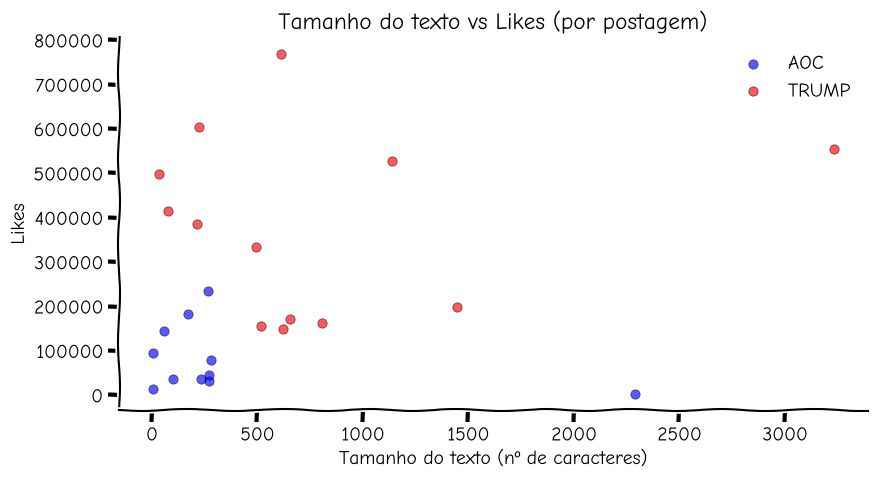

In [52]:
## Dispersão: tamanho do texto vs. likes (AOC x Trump)
# Scatter: tamanho do texto (len) vs likes, por político
scatter_df = (
    df.loc[df["text"].notna() & df["likes"].notna(), ["source", "text", "likes"]]
      .assign(text_len=lambda d: d["text"].str.len())
)

color_map = {"aoc": "blue", "trump": "red"}

with xkcd_context():
    fig, ax = plt.subplots(figsize=(9, 5))

    for src in ["aoc", "trump"]:
        sdf = scatter_df[scatter_df["source"].eq(src)]
        if sdf.empty:
            continue

        ax.scatter(
            sdf["text_len"],
            sdf["likes"],
            s=45,
            alpha=0.65,
            c=color_map.get(src, "gray"),
            edgecolors="black",
            linewidths=0.5,
            label=src.upper(),
        )

    ax.set_title("Tamanho do texto vs Likes (por postagem)")
    ax.set_xlabel("Tamanho do texto (nº de caracteres)")
    ax.set_ylabel("Likes")
    ax.legend(frameon=False)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    fig.tight_layout()
    plt.show()